<a href="https://colab.research.google.com/github/Harikrishna3/Harikrishna3/blob/main/TASK_2_Prediction_using_unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Author: Harikrishna Bomen**
# **Task 1: prediction using Unsupervised ML** 

**Import required libraries**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

**Read the data**

In [23]:
url = "https://raw.githubusercontent.com/Harikrishna3/Iris/main/Iris.csv"
data = pd.read_csv(url)
data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
data.shape


(150, 6)

In [25]:
# dropping Id column

data.drop('Id', axis=1, inplace=True)
data.columns


Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [26]:
print(data.isnull().sum(), '\n\nNumber of duplicate rows: ' , data.duplicated().sum())

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64 

Number of duplicate rows:  3


In [27]:
## drop duplicate rows

data.drop_duplicates(inplace=True)  

data.shape[0]  # gives number of rows. Similarly, data.shape[1] will give number of columns

## now number of rows left 147, earlier there were 150 rows.

147

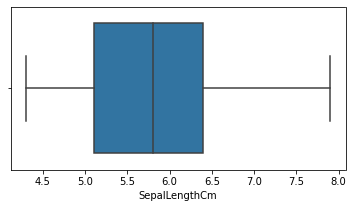

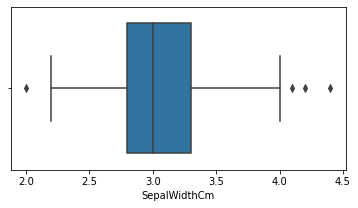

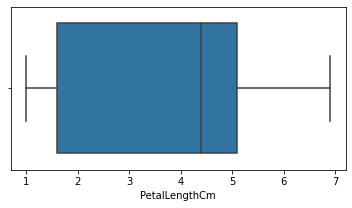

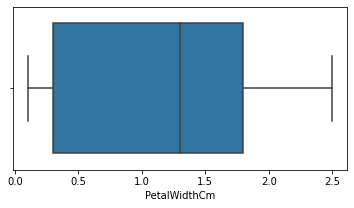

In [28]:
## Check for any outliers in the numeric data
for i in data.columns:
    if data[i].dtype=='float64':
        plt.figure(figsize=(6,3))
        sns.boxplot(data[i])
        plt.show()


**Understanding the data**

In [29]:
## Treating outliers present in the SepalWidthCm column

q1,q3 = np.percentile(data['SepalWidthCm'],[25,75])
iqr = q3-q1
lower_fence = q1 - (1.5*iqr)
upper_fence = q3 + (1.5*iqr)
data['SepalWidthCm'] = data['SepalWidthCm'].apply(lambda x: upper_fence if x>upper_fence 
                                                  else lower_fence if x<lower_fence else x)
        

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64


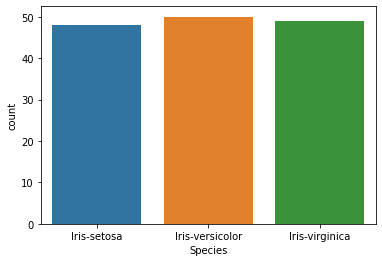

In [30]:
## Target class
print(data.Species.value_counts())
sns.countplot(data.Species);

In [31]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.052381,3.780272,1.208844
std,0.829100,0.426331,1.759111,0.757874
min,4.300000,2.050000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.050000,6.900000,2.500000


In [32]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

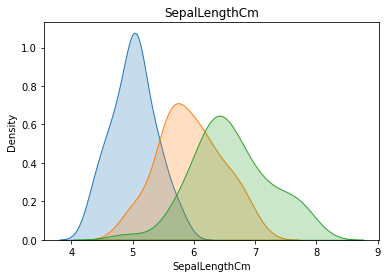

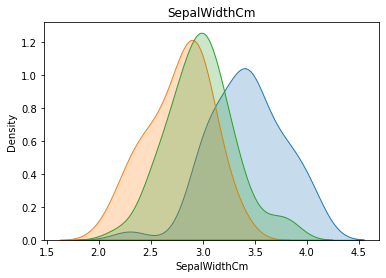

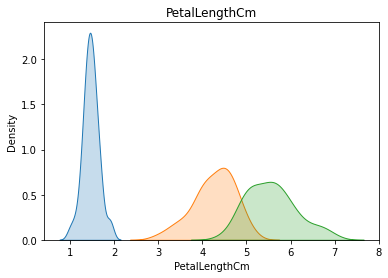

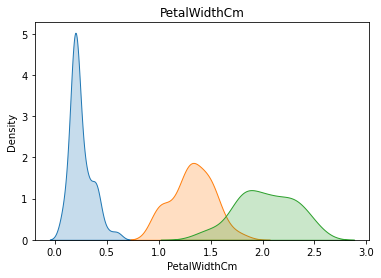

In [33]:
# Distributions of features by Species

for i in data.columns[:-1]:
    
    sns.kdeplot(data = data.loc[data.Species=='Iris-setosa'][i], label="Iris-setosa", shade=True)
    
    sns.kdeplot(data = data.loc[data.Species=='Iris-versicolor'][i], label="Iris-versicolor", shade=True)

    sns.kdeplot(data = data.loc[data.Species=='Iris-virginica'][i], label="Iris-virginica", shade=True)

    plt.title(i);
    
    plt.show()


In [34]:
## Correlation Matrix

data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.110155,0.871305,0.817058
SepalWidthCm,-0.110155,1.000000,-0.420140,-0.355139
PetalLengthCm,0.871305,-0.420140,1.000000,0.961883
PetalWidthCm,0.817058,-0.355139,0.961883,1.000000


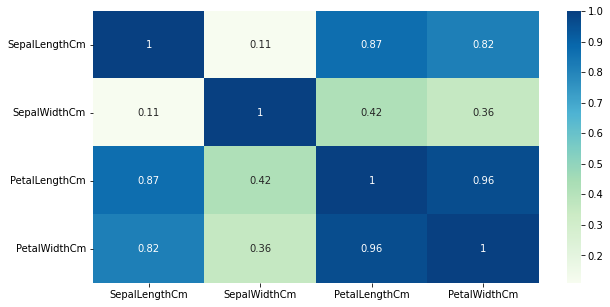

In [35]:
plt.figure(figsize=(10,5))
sns.heatmap(abs(data.corr()), cmap='GnBu', annot=True);

**K-means clustering**

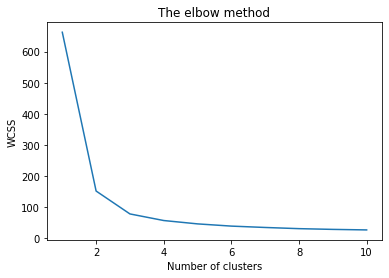

In [47]:
x = data.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [51]:
kmeans.labels_

array([4, 0, 0, 0, 4, 4, 0, 4, 0, 0, 4, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4,
       0, 4, 0, 0, 4, 4, 4, 0, 0, 4, 4, 4, 0, 4, 0, 4, 4, 0, 0, 4, 4, 0,
       4, 0, 4, 0, 6, 6, 6, 3, 6, 7, 6, 8, 6, 3, 8, 7, 3, 7, 3, 6, 7, 3,
       7, 3, 1, 7, 1, 7, 7, 6, 6, 6, 7, 3, 3, 3, 3, 1, 3, 7, 6, 7, 3, 3,
       3, 7, 3, 8, 3, 3, 3, 7, 8, 3, 2, 1, 5, 2, 2, 9, 3, 5, 2, 5, 2, 1,
       2, 1, 1, 2, 2, 9, 9, 1, 2, 1, 9, 1, 2, 5, 1, 1, 2, 5, 5, 9, 2, 1,
       1, 9, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [52]:
data['cluster'] = kmeans.labels_

data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,4
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,4
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,1
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [53]:
display(data['cluster'].value_counts(), data['Species'].value_counts())

4    27
2    22
0    21
3    20
1    17
7    13
6    11
5     6
9     6
8     4
Name: cluster, dtype: int64

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

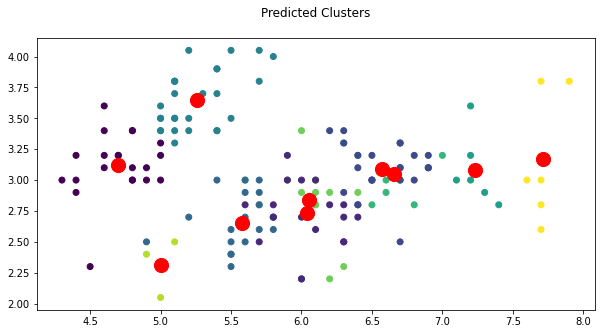

In [54]:
plt.figure(figsize=(10,5))
plt.scatter(data['SepalLengthCm'], data['SepalWidthCm'], c=data.cluster)
plt.title('Predicted Clusters\n')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1] ,  s=200, c='red', label = 'Centroids')
plt.show()

In [55]:
data.loc[data['Species']=='Iris-setosa']['cluster'].value_counts() ## the model has identified iris-setosa with 100% accuracy

4    27
0    21
Name: cluster, dtype: int64

In [56]:
data.loc[data['Species']=='Iris-versicolor']['cluster'].value_counts()

3    19
7    13
6    11
8     4
1     3
Name: cluster, dtype: int64

In [57]:
data.loc[data['Species']=='Iris-virginica']['cluster'].value_counts()

2    22
1    14
5     6
9     6
3     1
Name: cluster, dtype: int64

In [58]:
data['Species_encoded'] = data['Species'].apply(lambda x: 1 if x=='Iris-setosa' else 2 if x=='Iris-virginica' else 0)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster,Species_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,4,1
1,4.9,3.0,1.4,0.2,Iris-setosa,0,1
2,4.7,3.2,1.3,0.2,Iris-setosa,0,1
3,4.6,3.1,1.5,0.2,Iris-setosa,0,1
4,5.0,3.6,1.4,0.2,Iris-setosa,4,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2,2
146,6.3,2.5,5.0,1.9,Iris-virginica,1,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2,2


In [59]:

from sklearn.metrics import classification_report
print(classification_report(data['Species_encoded'],data['cluster']))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00        48
           2       1.00      0.45      0.62        49
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.15       147
   macro avg       0.10      0.04      0.06       147
weighted avg       0.33      0.15      0.21       147



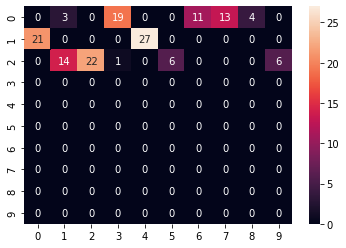

In [60]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(data['Species_encoded'],data['cluster']), annot=True);